In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.listdir("../input")

['database.sqlite', 'Iris.csv']

In [4]:
iris=pd.read_csv("../input/Iris.csv")

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris = iris.drop('Id',axis=1)

Feature Matrix

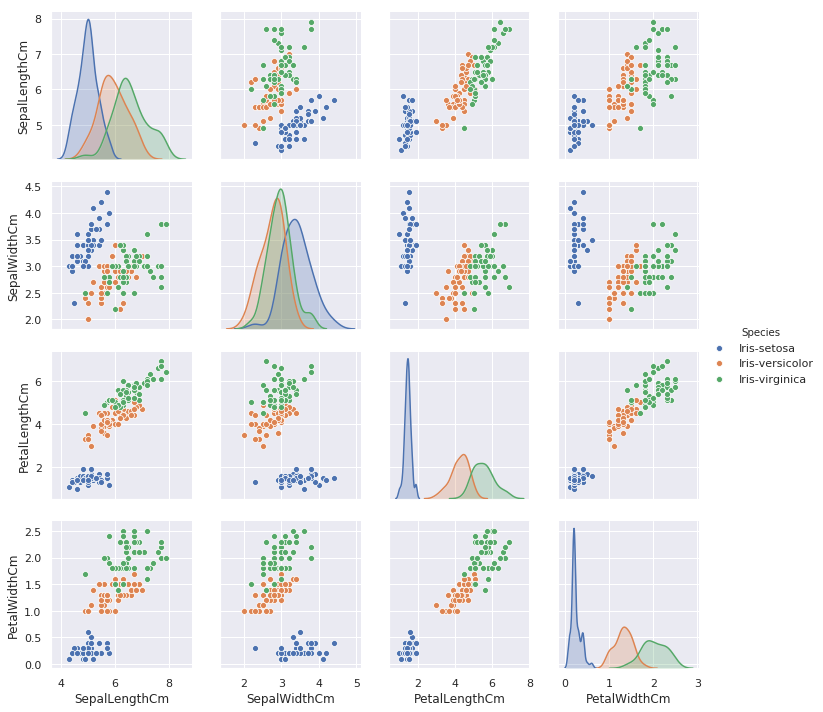

In [21]:
sns.pairplot(iris, hue='Species', size=2.5);


In [13]:
X_iris =iris.drop('Species',axis=1)
X_iris.shape


(150, 4)

In [14]:
y_iris =iris['Species']
y_iris.shape

(150,)

Simple Linear Regression 

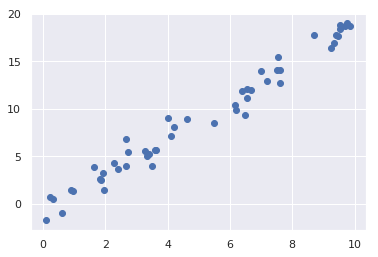

In [42]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(87)
x=10*rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x,y);

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [44]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
model.coef_

array([1.96428236])

In [46]:
model.intercept_

-0.8733808597721033

In [47]:
xfit = np.linspace(-1,11)

In [48]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit) 

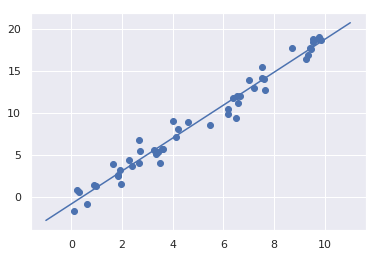

In [49]:
plt.scatter(x,y)
plt.plot(xfit,yfit);

監督式學習 : 鳶尾花分類 Naive Bayes Classification

In [51]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_iris,y_iris,random_state=1)

In [52]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

非監督式學習 : 鳶尾花分類 Principal Component Analysis

In [54]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D =model.transform(X_iris)

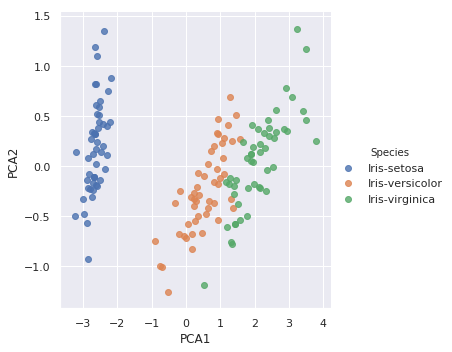

In [56]:
iris['PCA1'] =X_2D[:,0]
iris['PCA2'] =X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='Species',data = iris,fit_reg=False);

非監督式學習 : 鳶尾花集群 Clustering GMM Gaussian Mixture Model

In [58]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,covariance_type = 'full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

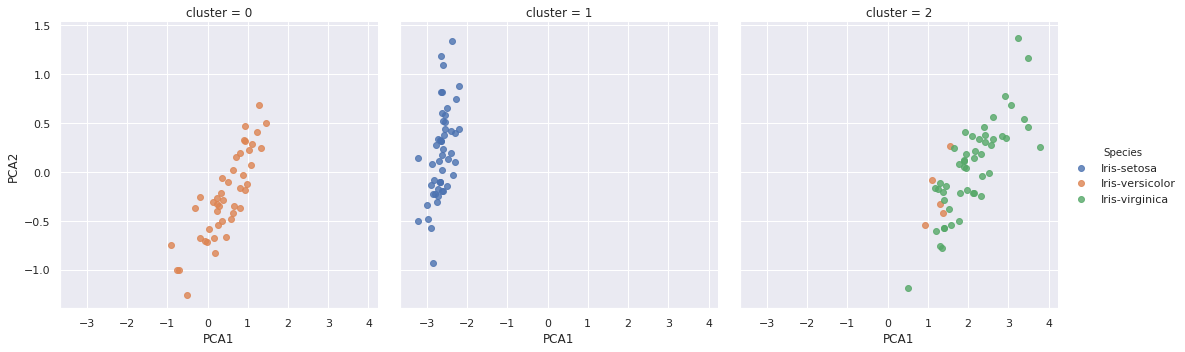

In [65]:
iris['cluster']= y_gmm
sns.lmplot("PCA1","PCA2",data=iris, hue='Species',col='cluster',fit_reg=False);